In [1]:
!nvidia-smi

Sat Nov 30 04:41:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="2nCpyunpXOPy8gFqfUAZ")
project = rf.workspace("baddewithana-p").project("neck_xray")
version = project.version(2)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to neck_xray-2 in yolov8-obb:: 100%|██████████| 2932/2932 [00:00<00:00, 5091.06it/s]


In [7]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

100%|██████████| 6.26M/6.26M [00:00<00:00, 108MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/datasets/neck_xray-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 23.2MB/s]


Overriding model.yaml nc=15 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.0MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/neck_xray-2/train/labels... 1278 images, 270 backgrounds, 0 corrupt: 100%|██████████| 1278/1278 [00:00<00:00, 1736.96it/s]

train: New cache created: /content/datasets/neck_xray-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/neck_xray-2/valid/labels... 122 images, 25 backgrounds, 0 corrupt: 100%|██████████| 122/122 [00:00<00:00, 1291.86it/s]

val: New cache created: /content/datasets/neck_xray-2/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.62G      1.514      3.342      1.996        114        640: 100%|██████████| 80/80 [00:30<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all        122        435      0.329      0.504      0.339      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.23G      1.173          2      1.746         81        640: 100%|██████████| 80/80 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        122        435      0.571       0.62      0.594      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.21G      1.086      1.478      1.694         64        640: 100%|██████████| 80/80 [00:28<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        122        435       0.74      0.619      0.723      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.19G      1.062      1.255      1.713         66        640: 100%|██████████| 80/80 [00:24<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]

                   all        122        435      0.719      0.761      0.798      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.21G      1.016      1.103       1.68         86        640: 100%|██████████| 80/80 [00:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        122        435      0.707      0.777      0.784      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.21G     0.9808       1.01      1.649         45        640: 100%|██████████| 80/80 [00:25<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        122        435      0.781      0.781      0.825       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.24G      0.958     0.9055      1.635         70        640: 100%|██████████| 80/80 [00:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        122        435      0.779      0.802      0.833      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.21G     0.9407     0.8826      1.618         77        640: 100%|██████████| 80/80 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]

                   all        122        435      0.857      0.764       0.85      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G     0.9287     0.8322      1.601         72        640: 100%|██████████| 80/80 [00:25<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]

                   all        122        435      0.855       0.81      0.879      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.21G     0.9408     0.8363      1.624         59        640: 100%|██████████| 80/80 [00:28<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        122        435      0.828      0.818      0.854      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.19G     0.9154     0.7971      1.601         74        640: 100%|██████████| 80/80 [00:25<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        122        435      0.859      0.793      0.863      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.21G     0.9062     0.7734      1.597         52        640: 100%|██████████| 80/80 [00:30<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        122        435      0.919       0.84      0.891      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.21G     0.9106     0.7718       1.59        100        640: 100%|██████████| 80/80 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        122        435      0.867      0.855      0.895      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.21G     0.8905     0.7232      1.579         98        640: 100%|██████████| 80/80 [00:24<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        122        435      0.892      0.832       0.87      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.22G     0.8739     0.7341      1.575         49        640: 100%|██████████| 80/80 [00:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        122        435      0.867      0.821      0.888      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.21G     0.8612     0.6896      1.546         70        640: 100%|██████████| 80/80 [00:25<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]

                   all        122        435      0.895      0.852      0.887      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.24G     0.8764     0.6954      1.574         86        640: 100%|██████████| 80/80 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        122        435      0.925      0.832      0.891      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.21G     0.8608     0.7042      1.551        104        640: 100%|██████████| 80/80 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        122        435      0.889      0.857      0.903      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.19G     0.8507      0.686       1.54         73        640: 100%|██████████| 80/80 [00:24<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        122        435      0.921      0.842      0.893      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.21G     0.8309     0.6592      1.516         61        640: 100%|██████████| 80/80 [00:27<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]

                   all        122        435      0.877      0.837        0.9      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.24G     0.8267     0.6562      1.512         88        640: 100%|██████████| 80/80 [00:24<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        122        435      0.941      0.812      0.891      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.21G     0.8316     0.6618      1.523         77        640: 100%|██████████| 80/80 [00:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]

                   all        122        435      0.891      0.834      0.888      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.21G     0.8288     0.6393      1.519         50        640: 100%|██████████| 80/80 [00:32<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        122        435      0.883      0.823      0.868      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.22G     0.8281     0.6125      1.524        112        640: 100%|██████████| 80/80 [00:25<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        122        435      0.907      0.854      0.895      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.21G     0.8232     0.6257      1.526         60        640: 100%|██████████| 80/80 [00:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        122        435      0.889      0.855      0.901      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.21G     0.8038     0.6007      1.485         77        640: 100%|██████████| 80/80 [00:25<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]


                   all        122        435      0.922      0.853      0.901      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.23G     0.8149     0.6285      1.515         96        640: 100%|██████████| 80/80 [00:25<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]

                   all        122        435      0.906      0.834      0.887      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.21G      0.784     0.5977      1.477         41        640: 100%|██████████| 80/80 [00:27<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]


                   all        122        435      0.919      0.842      0.894      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.24G     0.7946     0.6095      1.508         60        640: 100%|██████████| 80/80 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        122        435      0.925      0.839      0.899      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.21G     0.7722     0.5695      1.445         77        640: 100%|██████████| 80/80 [00:26<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        122        435      0.896      0.857      0.893      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.23G     0.7786     0.5833       1.48         82        640: 100%|██████████| 80/80 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        122        435      0.902      0.857      0.897      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.2G     0.7816     0.5815      1.467         65        640: 100%|██████████| 80/80 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        122        435      0.919      0.852        0.9      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.21G     0.7754     0.5703       1.49         82        640: 100%|██████████| 80/80 [00:27<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        122        435      0.936      0.855      0.892      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.21G     0.7754     0.5622      1.471        107        640: 100%|██████████| 80/80 [00:27<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        122        435      0.913       0.85        0.9      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.23G     0.7537     0.5568      1.441         80        640: 100%|██████████| 80/80 [00:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        122        435      0.932      0.857      0.894      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.21G     0.7853     0.5648      1.471         56        640: 100%|██████████| 80/80 [00:25<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        122        435       0.94      0.848      0.898      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.21G     0.7504     0.5615      1.458         84        640: 100%|██████████| 80/80 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        122        435      0.911      0.844      0.906       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.21G     0.7743     0.5645      1.468         88        640: 100%|██████████| 80/80 [00:26<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        122        435       0.92      0.844      0.907      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.21G     0.7504     0.5396      1.453         47        640: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        122        435      0.893      0.852      0.892      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.21G     0.7366     0.5376      1.429         77        640: 100%|██████████| 80/80 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        122        435      0.932      0.838      0.893      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.2G     0.7558     0.5444      1.437         56        640: 100%|██████████| 80/80 [00:24<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        122        435      0.899      0.869       0.91      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.23G     0.7345     0.5269      1.449         60        640: 100%|██████████| 80/80 [00:27<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        122        435      0.911      0.865      0.914      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.19G     0.7356     0.5299      1.426         89        640: 100%|██████████| 80/80 [00:24<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        122        435      0.908      0.852      0.919      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.21G     0.7301     0.5338      1.426         96        640: 100%|██████████| 80/80 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        122        435        0.9      0.853      0.904      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.24G     0.7377      0.526      1.444         70        640: 100%|██████████| 80/80 [00:31<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

                   all        122        435      0.908      0.871      0.908       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.22G     0.7305     0.5215      1.429         80        640: 100%|██████████| 80/80 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        122        435      0.872      0.868      0.906      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.23G     0.7218     0.5266      1.428         82        640: 100%|██████████| 80/80 [00:26<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.93it/s]

                   all        122        435      0.926       0.85      0.909      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.2G     0.7258     0.5199      1.431        109        640: 100%|██████████| 80/80 [00:25<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        122        435      0.914      0.867      0.921       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.21G     0.7204     0.5337      1.424         84        640: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        122        435      0.947       0.83      0.916      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.21G     0.7228      0.519       1.42         85        640: 100%|██████████| 80/80 [00:27<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        122        435      0.912       0.86      0.912      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.21G     0.7069     0.5043      1.417         62        640: 100%|██████████| 80/80 [00:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        122        435      0.918      0.857      0.907      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.19G     0.7046     0.5085      1.397         61        640: 100%|██████████| 80/80 [00:25<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]

                   all        122        435       0.94      0.837      0.909       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.21G     0.7173     0.5082      1.423         72        640: 100%|██████████| 80/80 [00:26<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]


                   all        122        435      0.918      0.869      0.911      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.2G     0.6879     0.4851      1.378         93        640: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        122        435       0.91      0.859      0.904      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G     0.6886       0.49      1.391         80        640: 100%|██████████| 80/80 [00:27<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]

                   all        122        435      0.911      0.856        0.9      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.21G     0.6984      0.501      1.378        103        640: 100%|██████████| 80/80 [00:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        122        435       0.92      0.853      0.902      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.23G     0.6878     0.4803        1.4         49        640: 100%|██████████| 80/80 [00:26<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        122        435      0.921      0.856      0.884      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.6897     0.4912      1.386         48        640: 100%|██████████| 80/80 [00:27<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        122        435      0.929      0.849      0.906      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.21G     0.6916     0.4915      1.381         59        640: 100%|██████████| 80/80 [00:24<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        122        435      0.936       0.86      0.907       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.21G     0.6905     0.4867      1.386         62        640: 100%|██████████| 80/80 [00:27<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all        122        435       0.94      0.849      0.908      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.21G     0.6871     0.4866      1.374         54        640: 100%|██████████| 80/80 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all        122        435      0.922      0.877      0.909      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.24G     0.6852     0.4934      1.385         63        640: 100%|██████████| 80/80 [00:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        122        435      0.924      0.856       0.91      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.21G     0.6737     0.4767      1.367         67        640: 100%|██████████| 80/80 [00:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        122        435       0.94      0.857      0.904      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.24G     0.6699     0.4729      1.362         55        640: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        122        435        0.9      0.871       0.91      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.21G     0.6745     0.4794      1.377         79        640: 100%|██████████| 80/80 [00:27<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all        122        435      0.938      0.852      0.913      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.21G      0.677     0.4814      1.369         87        640: 100%|██████████| 80/80 [00:24<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all        122        435      0.935      0.858      0.908      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.21G     0.6543     0.4641      1.348         66        640: 100%|██████████| 80/80 [00:30<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        122        435      0.921       0.88      0.912       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.21G     0.6608     0.4587      1.346        109        640: 100%|██████████| 80/80 [00:25<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        122        435      0.925      0.872      0.911      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.21G     0.6523      0.458      1.339         55        640: 100%|██████████| 80/80 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        122        435      0.932      0.867      0.912      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.2G     0.6621     0.4601      1.342         75        640: 100%|██████████| 80/80 [00:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        122        435      0.929      0.856      0.899      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.21G     0.6579     0.4658      1.338         95        640: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]

                   all        122        435      0.908      0.859      0.894      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.21G     0.6528     0.4572      1.337         73        640: 100%|██████████| 80/80 [00:28<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        122        435      0.923      0.866      0.905      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.21G     0.6518     0.4574      1.342         56        640: 100%|██████████| 80/80 [00:27<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        122        435      0.909      0.867        0.9      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.21G     0.6481     0.4628      1.347         86        640: 100%|██████████| 80/80 [00:27<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        122        435      0.922      0.865      0.902      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.21G     0.6557     0.4704      1.358         89        640: 100%|██████████| 80/80 [00:25<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        122        435      0.926      0.867      0.905       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.19G     0.6583     0.4611      1.352         78        640: 100%|██████████| 80/80 [00:26<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        122        435      0.918      0.851        0.9      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.21G     0.6412     0.4514      1.335         61        640: 100%|██████████| 80/80 [00:26<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]


                   all        122        435      0.921      0.862      0.909       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.2G     0.6425     0.4473       1.33         70        640: 100%|██████████| 80/80 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        122        435      0.935      0.865      0.909      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.21G     0.6348     0.4402      1.324         54        640: 100%|██████████| 80/80 [00:29<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        122        435      0.935      0.874      0.912      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.21G      0.627     0.4435       1.32         69        640: 100%|██████████| 80/80 [00:24<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        122        435      0.929      0.865      0.907      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.23G     0.6433     0.4475      1.343         77        640: 100%|██████████| 80/80 [00:26<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        122        435      0.931      0.865      0.903      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.24G     0.6263     0.4397      1.315         99        640: 100%|██████████| 80/80 [00:25<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]


                   all        122        435      0.925      0.868      0.912      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G     0.6309     0.4429      1.309         69        640: 100%|██████████| 80/80 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]

                   all        122        435      0.934      0.866      0.908      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.24G     0.6203      0.436      1.329         78        640: 100%|██████████| 80/80 [00:30<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        122        435      0.929      0.854      0.899      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.21G     0.6221      0.434      1.302         74        640: 100%|██████████| 80/80 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        122        435      0.936      0.854      0.904       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.24G     0.6132     0.4355      1.304        102        640: 100%|██████████| 80/80 [00:27<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.45it/s]

                   all        122        435      0.934      0.864      0.909      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.21G     0.6174      0.433      1.328         58        640: 100%|██████████| 80/80 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]


                   all        122        435      0.915      0.855      0.908      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.19G     0.6271     0.4464      1.329         60        640: 100%|██████████| 80/80 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]

                   all        122        435      0.919      0.864      0.911      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.21G     0.6132     0.4265      1.309         65        640: 100%|██████████| 80/80 [00:27<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        122        435      0.914       0.85        0.9      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.21G     0.6006     0.4145      1.297         60        640: 100%|██████████| 80/80 [00:27<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]

                   all        122        435      0.919      0.857      0.902      0.719


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.34G     0.5525     0.3622      1.247         34        640: 100%|██████████| 80/80 [00:29<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]

                   all        122        435      0.923      0.863      0.903       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.2G     0.5381     0.3531      1.225         30        640: 100%|██████████| 80/80 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

                   all        122        435      0.912      0.869      0.903      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.18G     0.5507     0.3562      1.244         50        640: 100%|██████████| 80/80 [00:25<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        122        435      0.927      0.864      0.901      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.2G     0.5422     0.3546      1.241         43        640: 100%|██████████| 80/80 [00:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.30it/s]

                   all        122        435      0.917       0.86      0.901      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.17G     0.5347     0.3523       1.23         37        640: 100%|██████████| 80/80 [00:25<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        122        435      0.925      0.855        0.9      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.2G     0.5351     0.3508      1.247         64        640: 100%|██████████| 80/80 [00:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]

                   all        122        435      0.922      0.861        0.9      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.2G     0.5364     0.3535      1.242         58        640: 100%|██████████| 80/80 [00:25<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        122        435      0.933      0.854        0.9      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.18G     0.5305     0.3506      1.222         52        640: 100%|██████████| 80/80 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]

                   all        122        435      0.933      0.855      0.902      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.18G     0.5308     0.3481      1.227         37        640: 100%|██████████| 80/80 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        122        435      0.934      0.851      0.902      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.18G     0.5353     0.3536       1.24         39        640: 100%|██████████| 80/80 [00:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]

                   all        122        435      0.936      0.849      0.902       0.73



100 epochs completed in 0.812 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.6MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.6MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


                   all        122        435      0.936       0.85      0.902      0.729
                     B         37         38      0.873      0.658      0.754      0.398
                    C3         77         77      0.968      0.896      0.947      0.834
                    C4         78         78      0.986      0.895      0.949      0.803
                    C5         76         76      0.945      0.911      0.973      0.854
                    C6         78         78      0.954      0.897      0.961      0.835
                    C7         75         75       0.92       0.92      0.963      0.783
                     D         13         13      0.904      0.769      0.768      0.599
Speed: 0.6ms preprocess, 4.0ms inference, 0.0ms loss, 12.1ms postprocess per image
Results saved to runs/obb/train


In [16]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/neck_xray-2/test/images/1-398-_JPG_jpg.rf.3c5357808b79310a1c1eb57a23b9c5fa.jpg: 640x640 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'B', 1: 'C3', 2: 'C4', 3: 'C5', 4: 'C6', 5: 'C7', 6: 'D'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [120, 120, 120]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [203, 203, 203],
        [203, 203, 203],
        [203, 203, 203]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [194, 194, 194],
        [196, 196, 196],
        [197, 197, 197]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
 

In [10]:
!pip install supervision -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.5 MB/s eta 0:00:00


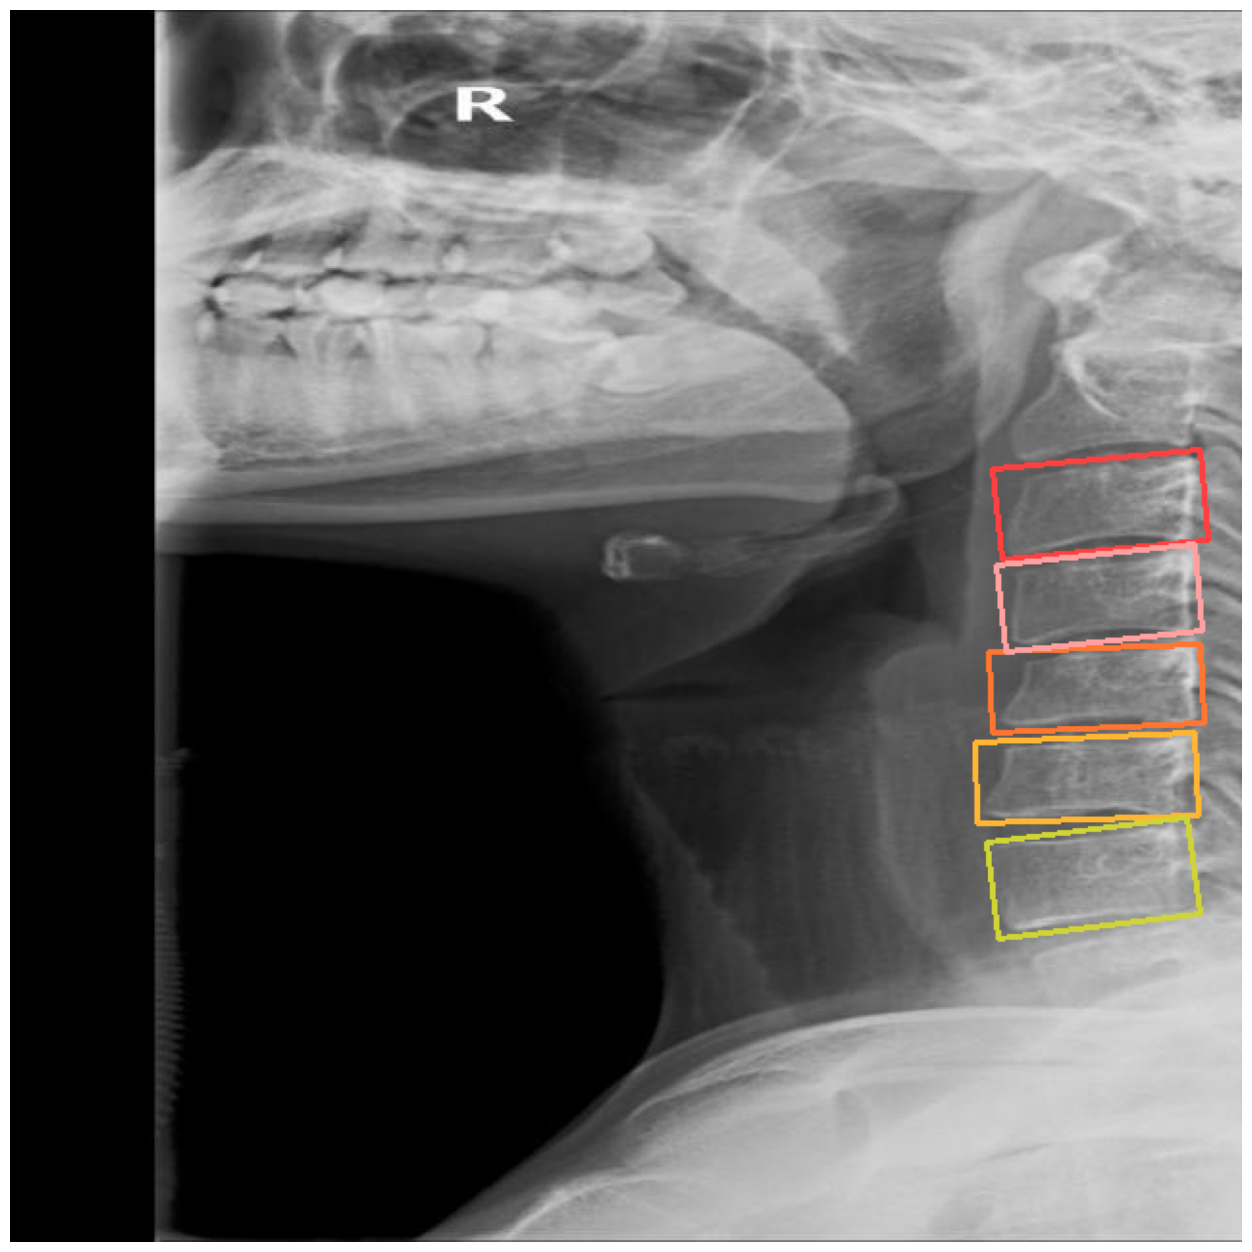

In [17]:
import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [18]:
model.save('/content/drive/MyDrive/yolov8obbhigh.h5')

In [19]:
# prompt: how can I download the runs folder

from google.colab import files
import shutil

# Zip the 'runs' folder
shutil.make_archive('runs', 'zip', 'runs')

# Download the zip file
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>